In [1]:
import Classifier.classifiermodel as clf
import Classifier.Dataloader
import tensorflow as tf
import os

In [2]:
base_dir = '../Datasets/dogs-vs-cats/'

model, summary = clf.model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 138, 138, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 138, 138, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 69, 69, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 69, 69, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 64)        0

In [3]:
# Added Learning rate schedular.

def schedular(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.2)


train, validation, steps_per_epoc, validation_steps = Classifier.Dataloader.load_data(train_dir=os.path.join(base_dir, 'train'),
                                                                                      classmode='categorical',
                                                                                      batch_size=10
                                                                                      )


Found 17500 validated image filenames belonging to 2 classes.
Found 7500 validated image filenames belonging to 2 classes.


In [4]:
lrSchedular = tf.keras.callbacks.LearningRateScheduler(schedular)
earlyStoping = tf.keras.callbacks.EarlyStopping(patience=10)


history = model.fit(train,
                    epochs=50,
                    validation_data=validation,
                    validation_steps=validation_steps,  # Match steps with your batch for avoiding data generator error
                    steps_per_epoch=steps_per_epoc,
                    callbacks=[lrSchedular, earlyStoping]
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1750 steps, validate for 750 steps
Epoch 1/50
1750/1750 [==============================] - 467s 267ms/step - loss: 1.2670 - accuracy: 0.5730 - val_loss: 0.6764 - val_accuracy: 0.5503
Epoch 2/50
1750/1750 [==============================] - 158s 90ms/step - loss: 0.6610 - accuracy: 0.6170 - val_loss: 0.8165 - val_accuracy: 0.6157
Epoch 3/50
1750/1750 [==============================] - 155s 88ms/step - loss: 0.6494 - accuracy: 0.6364 - val_loss: 0.6849 - val_accuracy: 0.6251
Epoch 4/50
1750/1750 [==============================] - 157s 90ms/step - loss: 0.6326 - accuracy: 0.6497 - val_loss: 0.6269 - val_accuracy: 0.6789
Epoch 5/50
1750/1750 [==============================] - 157s 90ms/step - loss: 0.6247 - accuracy: 0.6600 - val_loss: 0.6830 - val_accuracy: 0.6395
Epoch 6/50
1750/1750 [==============================] - 157s 90ms/step - loss: 0.6171 - accuracy: 0.6719 - val_loss: 0.6010 - val_accuracy: 0.6973
Epoch 7/50
1750/1750 [

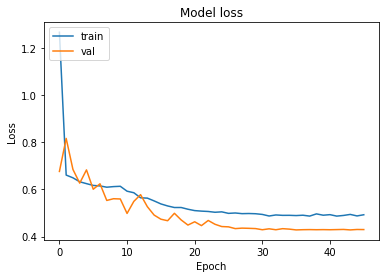

In [5]:
import matplotlib.pyplot as plt

# plot train and test loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

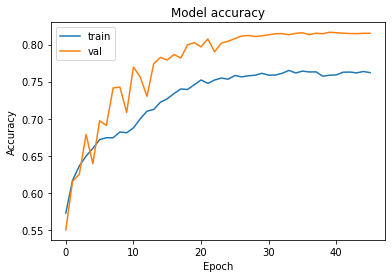

In [6]:
# plot train and test loss.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [9]:
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
files = os.listdir(os.path.join(base_dir, 'test1'))
classes = []
testDf = pd.DataFrame({'files' : files,
                        })

testDf.tail()
samples = testDf.shape[0]

In [13]:
test_generator = ImageDataGenerator(rescale=1. / 255)
test_dir = os.path.join(base_dir, 'test1')
test_data = test_generator.flow_from_dataframe(testDf,
                                               test_dir,
                                               x_col='files',
                                               y_col=None,
                                               target_size=(140,140),
                                               batch_size=10,
                                               class_mode=None,
                                               shuffle=False
                                               )

Found 12500 validated image filenames.


In [16]:
import numpy as np
prediction = model.predict(test_data,
                           steps=np.ceil(samples/10))

In [18]:
testDf['classes'] = np.argmax(prediction, axis=-1)